# EMNIST Classifier
#### More information about the dataset can be found from https://www.nist.gov/itl/products-and-services/emnist-dataset

## Importing Libraries

In [1]:
import tensorflow as tf
from mnist import MNIST
#mnist is a python library which has the EMNIST and MNIST datasets. 

import numpy as np
import matplotlib.pyplot as plt

from emnist import extract_training_samples
from emnist import list_datasets
from emnist import extract_test_samples

In [2]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

## Extracting the Trainable Dataset and Image Pre-Processing

In [3]:
train_images, train_labels = extract_training_samples('byclass')
print(train_images.shape)
print(train_labels.shape)

(697932, 28, 28)
(697932,)


In [4]:
test_images, test_labels = extract_test_samples('byclass')
print(test_images.shape)
print(test_labels.shape)

(116323, 28, 28)
(116323,)


In [5]:
#Normalizing the Images
train_images = np.array(train_images) / 255.0
train_labels = np.array(train_labels)
test_images = np.array(test_images) / 255.0
test_labels = np.array(test_labels)

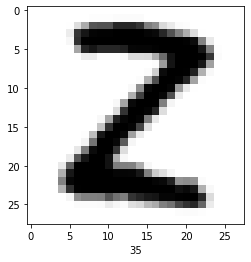

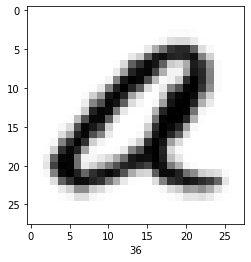

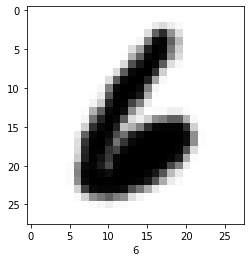

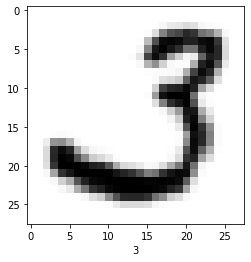

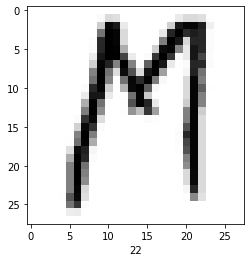

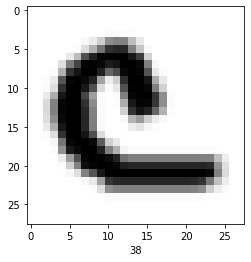

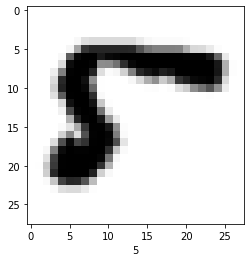

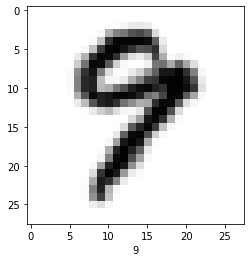

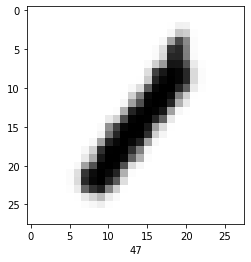

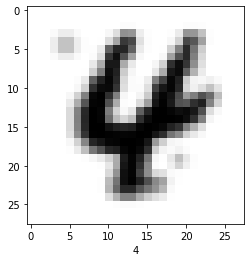

In [6]:
#Let's print the first 10 letters from EMINST training samples.
for i in range(10):
    first_ten_letters = train_images[i].reshape((28, 28))
    plt.imshow(first_ten_letters, cmap = 'binary')
    #plt.axis("off")
    plt.xlabel(train_labels[i])
    plt.show()

## Creating the Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(62, activation = 'softmax')
])

Metal device set to: Apple M1


2022-02-08 18:44:22.846693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-08 18:44:22.847331: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=3)

2022-02-08 18:44:26.972805: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/3


2022-02-08 18:44:27.267729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5453/5453 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.8206

2022-02-08 18:45:39.794718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5453/5453 [==============================] - 79s 14ms/step - loss: 0.5353 - accuracy: 0.8206 - val_loss: 0.4220 - val_accuracy: 0.8458
Epoch 2/3
5453/5453 [==============================] - 77s 14ms/step - loss: 0.3969 - accuracy: 0.8558 - val_loss: 0.3896 - val_accuracy: 0.8586
Epoch 3/3
5453/5453 [==============================] - 79s 14ms/step - loss: 0.3705 - accuracy: 0.8633 - val_loss: 0.3743 - val_accuracy: 0.8615


In [11]:
scores = model.evaluate(test_images,test_labels)

3636/3636 [==============================] - 18s 5ms/step - loss: 0.3743 - accuracy: 0.8615


In [12]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 86.15%


## Creating the Model History Graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


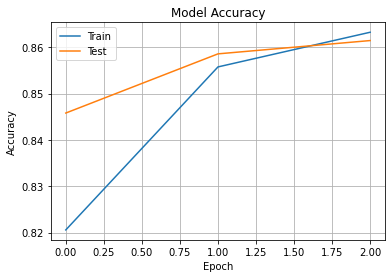

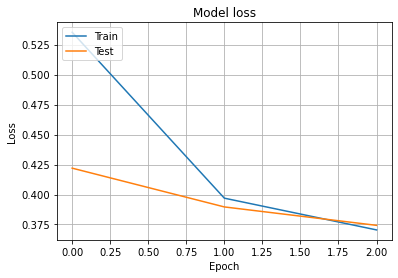

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

In [14]:
predictions = model.predict(test_images)

2022-02-08 18:48:41.893877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [15]:
predictions.shape

(116323, 62)

## Saving the Model

In [16]:
model.save("/Users/puravgupta/Jupyter Notebooks/EMNIST Saved Model")

2022-02-08 18:48:59.887171: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/puravgupta/Jupyter Notebooks/EMNIST Saved Model/assets
